In [1]:
import os
import time

import numpy as np
import itertools as it
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

from importlib import reload

codeLocation = os.path.join(os.path.expanduser("~"), "ggogIsg", "gitrepos", "TSP", "py")
homeLocation = os.getcwd()

os.chdir(codeLocation)
import tsp_sim_randomTowns as sim
import tsp_proc as tsp
os.chdir(homeLocation)

print("Setup complete!")

FileNotFoundError: [Errno 2] No such file or directory: '/home/wsignorke/ggogIsg/gitrepos/TSP/py'

Ok! Time taken: 0.03 sec.


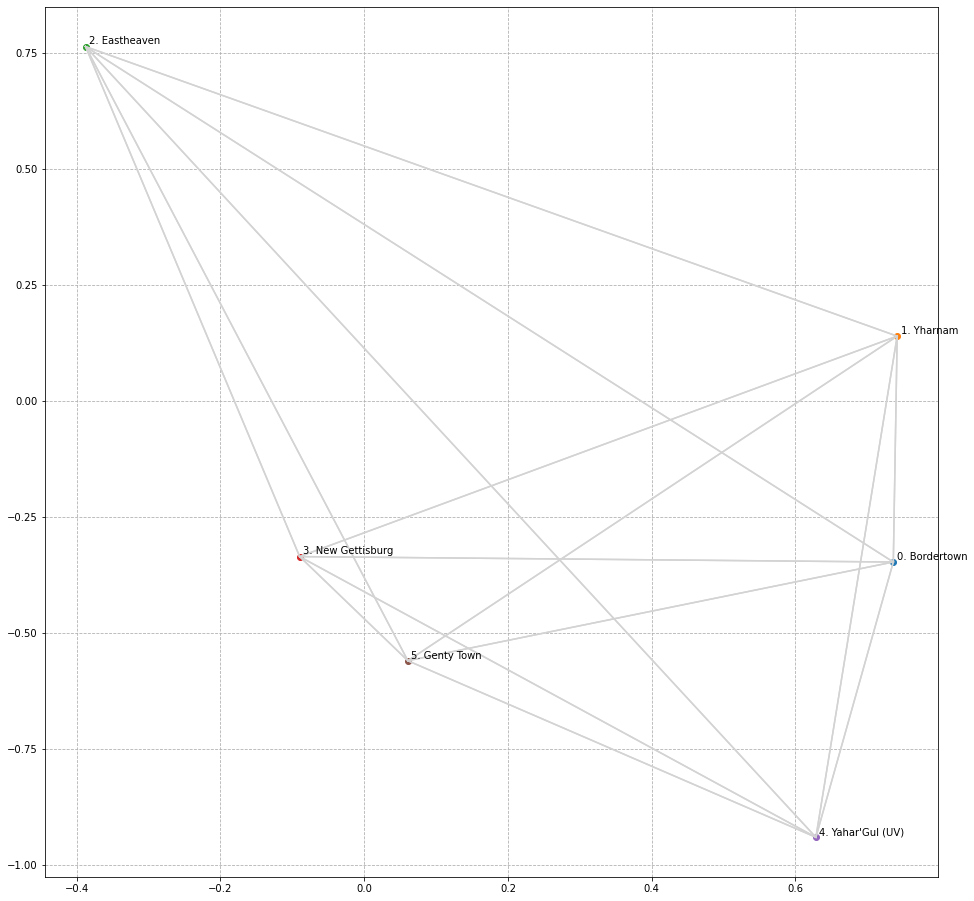

In [100]:
os.chdir(codeLocation)
reload(tsp)
reload(sim)
os.chdir(homeLocation)

timeStart = time.time()

towns = sim.generateTowns(n=6)
sim.plotTowns(towns, nk=8, plotSize=16)

timeTaken = time.time() - timeStart
print("Ok! Time taken: {} sec.".format("%.2f"%timeTaken))

In [ ]:
def beGreedy(towns):
    distmat = tsp.xyDistMatrix([town[1][0] for town in towns],
                               [town[1][1] for town in towns])

    maxval = np.finfo(type(towns[0][1][0])).max 
    e = np.identity(n=len(towns)) * maxval
    fdistmat = distmat.copy() + e
    
    route = [0]
    distance = 0.0
    
    lx = 0
    fdistmat[:, lx] = maxval
    
    for i in range(fdistmat.shape[0]-1):
        nx = np.argmin(fdistmat[lx])
        route += [nx]
        distance += fdistmat[lx, nx]
        fdistmat[:, nx] = maxval
        
        lx = nx
        
    route += [0]
    distance += distmat[0, lx] 
        
    return(route, distance)


##
timeStart = time.time()

route, distance = beGreedy(towns)
routeCoords = [towns[i] for i in route]
print(route, distance)

sim.plotTowns(towns, nk=8, shortestRoute=routeCoords, plotSize=16)

timeTaken = time.time() - timeStart
print("Ok! Time taken: {} sec.".format("%.2f"%timeTaken))

In [84]:
def permugen(nk):
    def underhoodgen(xs):
        if len(xs)==0:
            yield(())
        else:
            for no,x in enumerate(xs[:nk]):
                for rs in underhoodgen(xs[:no] + xs[no+1:]):
                    yield((x,) + rs)
    ##
    return(underhoodgen)

##
xs = list(range(3))
gen = permugen(2)(xs)

for x in gen:
    print(x)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)


In [103]:
class IdxMat:
    def __init__(self, mat, ids):
        ## remained points distance matrix
        self.mat = mat
        ## global (initial matrix) indices
        self.ids = ids        
        
    def excludeIdx(self, idxLocal=None, idxGlobal=None):
        if (idxLocal is not None) and (idxGlobal is None):
            pass
        elif (idxGlobal is not None) and (idxLocal is None):
            idxLocal = np.argmin(np.abs(self.ids - idxGlobal))
        else:
            raise Exception("Either global or local index shall be provided, not both or none")
        
        return(IdxMat(mat=np.delete(np.delete(self.mat, idxLocal, axis=1),
                                    idxLocal, axis=0),
                      ids=np.delete(self.ids, idxLocal, axis=0)))
    
    def toGlobal(self, idxLocal):
        return(np.squeeze(self.ids[idxLocal]))
    
    def toLocal(self, idxGlobal):
        return(np.argmin(np.abs(self.ids - idxGlobal)))



## INITIALS
print("INITIALS")
nk = 3
noToContinue = 1
distmat = tsp.xyDistMatrix([town[1][0] for town in towns],
                           [town[1][1] for town in towns])
idxMat = IdxMat(mat=distmat,
                ids=np.arange(distmat.shape[0]))
print("IDs:\n{}".format(idxMat.ids))
print("Dists:\n{}".format(idxMat.mat))

collected = []
accumulated = 0.0
print("Collected points: {}".format(collected))
print("Accumulated distance: {}".format(distance), end="\n\n")

## START WITH 0
print("START WITH 0")
idx = 0
gdx = idxMat.toGlobal(idx)
print("Start Idx (local <== glob):", idx, "<==", gdx)

cs = np.argsort(idxMat.mat[idx])[1:nk+1]
vs = np.sort(idxMat.mat[idx])[1:nk+1]
gs = idxMat.toGlobal(cs)
print("Closest indcs (local <== glob): {} <== {}".format(cs, gs))
print("Distances", vs)

idxMat0 = idxMat.excludeIdx(idxGlobal=idx)
collected += [gdx]
startNext = gdx
print("Collected indices: {}".format(collected))
print("Matrix remain:\n{}\n\n".format(idxMat0.mat))

## CONTINUE WITH 2nd closest
print("CONTINUE WITH 2nd CLOSEST")
gdx = gs[1]
idx = idxMat0.toLocal(gdx)
print("Start Idx (glob ==> local): {} ==> {}".format(gdx, idx))

collected += [gdx]
accumulated += distmat[startNext, gdx]
print("Collected indices: {}".format(collected))
print("Accumulated distance: {}".format(accumulated))
startNext = gdx

cs = np.argsort(idxMat0.mat[idx])[1:nk+1]
vs = np.sort(idxMat0.mat[idx])[1:nk+1]
gs = idxMat0.toGlobal(cs)
print("Closest indcs (local <== glob): {} <== {}".format(cs, gs))
print("Distances", vs)

idxMat1A = idxMat0.excludeIdx(idxGlobal=gdx)
print("Matrix remain:\n{}\n\n".format(idxMat1A.mat))

## CONTINUE WITH 2nd closest
print("CONTINUE WITH 2nd CLOSEST")
gdx = gs[1]
idx = idxMat1A.toLocal(gdx)
print("Start Idx (glob ==> local): {} ==> {}".format(gdx, idx))

collected += [gdx]
accumulated += distmat[startNext, gdx]
print("Collected indices: {}".format(collected))
print("Accumulated distance: {}".format(accumulated))
startNext = gdx

cs = np.argsort(idxMat1A.mat[idx])[1:nk+1]
vs = np.sort(idxMat1A.mat[idx])[1:nk+1]
gs = idxMat1A.toGlobal(cs)
print("Closest indcs (local <== glob): {} <== {}".format(cs, gs))
print("Distances", vs)

idxMat2A = idxMat1A.excludeIdx(idxGlobal=gdx)
collected += [gdx]
print("Matrix remain:\n{}\n\n".format(idxMat2A.mat))

INITIALS
IDs:
[0 1 2 3 4 5]
Dists:
[[0.    0.487 1.581 0.826 0.603 0.708]
 [0.487 0.    1.291 0.958 1.086 0.976]
 [1.581 1.291 0.    1.139 1.985 1.398]
 [0.826 0.958 1.139 0.    0.939 0.27 ]
 [0.603 1.086 1.985 0.939 0.    0.684]
 [0.708 0.976 1.398 0.27  0.684 0.   ]]
Collected points: []
Accumulated distance: 0.0

START WITH 0
Start Idx (local <== glob): 0 <== 0
Closest indcs (local <== glob): [1 4 5] <== [1 4 5]
Distances [0.487 0.603 0.708]
Collected indices: [0]
Matrix remain:
[[0.    1.291 0.958 1.086 0.976]
 [1.291 0.    1.139 1.985 1.398]
 [0.958 1.139 0.    0.939 0.27 ]
 [1.086 1.985 0.939 0.    0.684]
 [0.976 1.398 0.27  0.684 0.   ]]


CONTINUE WITH 2nd CLOSEST
Start Idx (glob ==> local): 4 ==> 3
Collected indices: [0, 4]
Accumulated distance: 0.6031569892311621
Closest indcs (local <== glob): [4 2 0] <== [5 3 1]
Distances [0.684 0.939 1.086]
Matrix remain:
[[0.    1.291 0.958 0.976]
 [1.291 0.    1.139 1.398]
 [0.958 1.139 0.    0.27 ]
 [0.976 1.398 0.27  0.   ]]


CONTINUE

In [ ]:
def gd():
    pass

In [116]:
class IdxMat:
    def __init__(self, mat, ids):
        ## remained points distance matrix
        self.mat = mat
        ## global (initial matrix) indices
        self.ids = ids        
        
    def excludeIdx(self, idx):
        return(IdxMat(mat=np.delete(np.delete(self.mat, idx, axis=1),
                                    idx, axis=0),
                      ids=np.delete(self.ids, idx, axis=0)))
    
    def __str__(self):
        idsStrLen = len(str(self.ids)) + 9
        return("Indices: {}\n{}\n{}".format(self.ids, "-"*idsStrLen, self.mat))
    
    def __repr__(self):
        return(self.__str__())
    
    
'''
## TEST
v = np.arange(7)
vs = np.add(*np.meshgrid(v,v))

idxmat = IdxMat(mat=vs, ids=np.arange(vs.shape[0]))
print(idxmat, end="\n\n")

toExclude = np.array([5,1,2])
idxmat = idxmat.excludeIdx(toExclude)
print(idxmat)
'''

def permugen(distanceMatrix, nk):
    idxmat = IdxMat(mat=distanceMatrix,
                    ids=np.arange(distanceMatrix.shape[0]))
    start = 0
    
    def underhoodgen(start, collectedPts, remainPts):
        if remainPts.shape[0]==0:
            yield(collectedPts)
        else:
            imat = idxmat.excludeIdx(collectedPts)
            lids = 
            dids = 
            for no,c in enumerate(xs[:nk]):
                for rs in underhoodgen(xs[:no] + xs[no+1:]):
                    yield((x,) + rs)
    ##
    return(underhoodgen)

Indices: [0 1 2 3 4 5 6]
------------------------
[[ 0  1  2  3  4  5  6]
 [ 1  2  3  4  5  6  7]
 [ 2  3  4  5  6  7  8]
 [ 3  4  5  6  7  8  9]
 [ 4  5  6  7  8  9 10]
 [ 5  6  7  8  9 10 11]
 [ 6  7  8  9 10 11 12]]

Indices: [0 3 4 6]
------------------
[[ 0  3  4  6]
 [ 3  6  7  9]
 [ 4  7  8 10]
 [ 6  9 10 12]]
